In [1]:
## tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [4]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [5]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [6]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [7]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': "Using Robots in Nursing Homes Linked to Higher Employee Retention, Better Patient Care\n\nMonday, January 6, 2025\n\nAI Slashes Cost and Time for Chip Design, but That Is Not All\n\nThursday, January 2, 2025\n\nArtificial Intelligence: Algorithms Improve Medical Image Analysis\n\nFriday, December 27, 2024\n\nCrossing the Uncanny Valley: Breakthrough in Technology for Lifelike Facial Expressions in Androids\n\nThursday, December 26, 2024\n\nWind Sensing by Biomimetic Flexible Flapping Wing With Strain Sensors [...] Tuesday, November 12, 2024\n\nGiving Robots Superhuman Vision Using Radio Signals\n\nMonday, November 11, 2024\n\nAI Can Detect Serious Neurologic Changes in Babies in the NICU Using Video Data Alone\nRobot That Watched Surgery Videos Performs With Skill of Human Doctor, Researchers Report\n\nThursday, November 7, 2024\n

In [8]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [9]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")


In [10]:
llm.invoke("What is ML?")

AIMessage(content='\n<think>\nOkay, the user is asking "What is ML?" so I need to explain machine learning in a clear and concise way. Let me start by defining what ML is. I should mention that it\'s a subset of AI, right? But maybe I should explain that first. Wait, the user might not know what AI is either. Hmm, maybe start with a simple definition: ML is the ability of computers to learn from data and improve at tasks without being explicitly programmed for each step. \n\nI should break it down into key components. Maybe talk about data, learning process, and the model. Oh, right, there are different types of ML: supervised, unsupervised, reinforcement learning. I should mention those briefly. Examples would help too, like email spam filters or recommendation systems. But I need to avoid jargon as much as possible.\n\nWait, the user might be a beginner, so I should start with the basics. Let me structure it step by step. First, define ML, then maybe how it works with data, the types

In [11]:
llm_with_tools=llm.bind_tools(tools=tools)


In [12]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_9ksr', 'function': {'arguments': '{"query": "recent news on artificial intelligence advancements and developments"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 175, 'prompt_tokens': 356, 'total_tokens': 531, 'completion_time': 0.425050752, 'prompt_time': 0.027691109, 'queue_time': 0.24853793600000001, 'total_time': 0.452741861}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4811f707-4bf6-4bdb-96c9-d2dd50be5567-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on artificial intelligence advancements and developments'}, 'id': 'call_9ksr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 356, 'output_tokens': 175, 'total_tokens': 531})

In [13]:
## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kz1b', 'function': {'arguments': '{"query": "quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 307, 'prompt_tokens': 357, 'total_tokens': 664, 'completion_time': 0.767109346, 'prompt_time': 0.030940333, 'queue_time': 0.25539084100000004, 'total_time': 0.798049679}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_07cd5d759a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c8b11490-9011-4121-8a37-c15ba1a94849-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'call_kz1b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 357, 'output_tokens': 307, 'total_tokens': 664})

In [14]:
## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1zvx', 'function': {'arguments': '{"query": "Machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 330, 'prompt_tokens': 353, 'total_tokens': 683, 'completion_time': 0.800013369, 'prompt_time': 0.021880478, 'queue_time': 0.24483532099999997, 'total_time': 0.821893847}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d5ea20d6-8cfe-434e-aaf1-e288f5640d42-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine learning'}, 'id': 'call_1zvx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 353, 'output_tokens': 330, 'total_tokens': 683})

## Workflow 

In [15]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage # Human message or AI message
from typing import Annotated  ##labeling
from langgraph.graph.message import add_messages  # Reducers in Langgraph

In [16]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [17]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

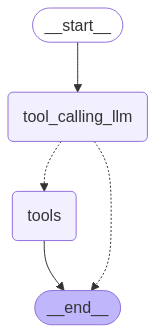

In [18]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_yey4)
 Call ID: call_yey4
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [20]:
messages=graph.invoke({"messages":"Hi My name is Srijan Joshi"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi My name is Srijan Joshi
================================== Ai Message ==================================

Hello Srijan! Nice to meet you. I'm Qwen, a large language model developed by Alibaba Cloud. How can I assist you today? 😊


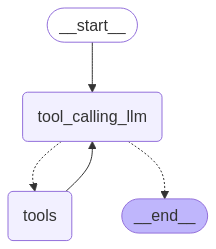

In [21]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_ydgs)
 Call ID: call_ydgs
  Args:
    query: recent AI news
  arxiv (call_0atn)
 Call ID: call_0atn
  Args:
    query: quantum computing
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "AI News | Latest AI News, Analysis & Events", "url": "https://www.artificialintelligence-news.com/", "content": "Marketing Tech News\nApril 16, 2025\nOpenAI explores social platform following $40B funding round\n\nAI News\nApril 15, 2025\nMeta will train AI models using EU user data\n\nDeveloper Tech News\nApril 15, 2025\nMasquerading payment npm package installs backdoor\n\nTelecoms Tech News\nApril 15, 2025\nFCC chair calls E